In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

### Importing data

In [3]:
df = pd.read_csv('Unemployment in India.csv')
df_2 = pd.read_csv('Unemployment_Rate_upto_11_2020.csv')

print(df.shape, df_2.shape, sep='\n')

(768, 7)
(267, 9)


In [4]:
df.head()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762.0,44.68,Rural


In [5]:
df_2.head()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Region.1,longitude,latitude
0,Andhra Pradesh,31-01-2020,M,5.48,16635535,41.02,South,15.9129,79.74
1,Andhra Pradesh,29-02-2020,M,5.83,16545652,40.90,South,15.9129,79.74
2,Andhra Pradesh,31-03-2020,M,5.79,15881197,39.18,South,15.9129,79.74
3,Andhra Pradesh,30-04-2020,M,20.51,11336911,33.10,South,15.9129,79.74
4,Andhra Pradesh,31-05-2020,M,17.43,12988845,36.46,South,15.9129,79.74


In [6]:
df.info()
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 7 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Region                                    740 non-null    object 
 1    Date                                     740 non-null    object 
 2    Frequency                                740 non-null    object 
 3    Estimated Unemployment Rate (%)          740 non-null    float64
 4    Estimated Employed                       740 non-null    float64
 5    Estimated Labour Participation Rate (%)  740 non-null    float64
 6   Area                                      740 non-null    object 
dtypes: float64(3), object(4)
memory usage: 42.1+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 267 entries, 0 to 266
Data columns (total 9 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                  

In [7]:
# Feature (column) names have extra spaces

df.columns = df.columns.str.strip()

df_2.columns = df_2.columns.str.strip()

In [8]:
# For better visualization rounding the Estimated Employed

df['Estimated Employed'] = round((df['Estimated Employed']/1000000), 2)
df_2['Estimated Employed'] = round((df_2['Estimated Employed']/1000000), 2)


In [9]:
df[['Estimated Unemployment Rate (%)', 'Estimated Employed', 'Estimated Labour Participation Rate (%)']].describe()

,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%)
count,740.000000,740.000000,740.000000
mean,11.787946,7.204514,42.630122
std,10.721298,8.088088,8.111094
min,0.000000,0.050000,13.330000
25%,4.657500,1.187500,38.062500
50%,8.350000,4.745000,41.160000
75%,15.887500,11.277500,45.505000
max,76.740000,45.780000,72.570000


In [10]:
df_2[['Estimated Unemployment Rate (%)', 'Estimated Employed', 'Estimated Labour Participation Rate (%)']].describe()

,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%)
count,267.000000,267.000000,267.000000
mean,12.236929,13.962322,41.681573
std,10.803283,13.366408,7.845419
min,0.500000,0.120000,16.770000
25%,4.845000,2.840000,37.265000
50%,9.650000,9.730000,40.390000
75%,16.755000,21.880000,44.055000
max,75.850000,59.430000,69.690000


### Finding missing values

In [12]:
df.isnull().sum()

Region                                     28
Date                                       28
Frequency                                  28
Estimated Unemployment Rate (%)            28
Estimated Employed                         28
Estimated Labour Participation Rate (%)    28
Area                                       28
dtype: int64

In [13]:
df_2.isnull().sum()

Region                                     0
Date                                       0
Frequency                                  0
Estimated Unemployment Rate (%)            0
Estimated Employed                         0
Estimated Labour Participation Rate (%)    0
Region.1                                   0
longitude                                  0
latitude                                   0
dtype: int64

In [14]:
df[df.isnull().any(axis=1)]

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
359,NaN,NaN,NaN,NaN,NaN,NaN,NaN
360,NaN,NaN,NaN,NaN,NaN,NaN,NaN
361,NaN,NaN,NaN,NaN,NaN,NaN,NaN
362,NaN,NaN,NaN,NaN,NaN,NaN,NaN
363,NaN,NaN,NaN,NaN,NaN,NaN,NaN
364,NaN,NaN,NaN,NaN,NaN,NaN,NaN
365,NaN,NaN,NaN,NaN,NaN,NaN,NaN
366,NaN,NaN,NaN,NaN,NaN,NaN,NaN
367,NaN,NaN,NaN,NaN,NaN,NaN,NaN
368,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### As these missing values are absolute null we can drop them.

In [16]:
df.dropna(inplace=True)

In [17]:
df.reset_index(inplace=True, drop = True)

In [18]:
df

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
0,Andhra Pradesh,31-05-2019,Monthly,3.65,12.00,43.24,Rural
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11.76,42.05,Rural
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12.09,43.50,Rural
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12.29,43.97,Rural
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12.26,44.68,Rural
...,...,...,...,...,...,...,...
735,West Bengal,29-02-2020,Monthly,7.55,10.87,44.09,Urban
736,West Bengal,31-03-2020,Monthly,6.67,10.81,43.34,Urban
737,West Bengal,30-04-2020,Monthly,15.63,9.30,41.20,Urban
738,West Bengal,31-05-2020,Monthly,15.22,9.24,40.67,Urban


In [19]:
df['Date'] = pd.to_datetime(df['Date'])

df['Area'] = df['Area'].astype('category')

In [20]:
df_2['Date'] = pd.to_datetime(df_2['Date'])

df_2['Region'] = df_2['Region'].astype('category')

#### Finding unique values

In [22]:
df.columns = list(df.columns.str.strip())

In [23]:
for col in df.columns:
    print('Feature = ', col, '\n', df[col].unique(), end = '\n' + '*' * 100 + '\n')

Feature =  Region 
 ['Andhra Pradesh' 'Assam' 'Bihar' 'Chhattisgarh' 'Delhi' 'Goa' 'Gujarat'
 'Haryana' 'Himachal Pradesh' 'Jammu & Kashmir' 'Jharkhand' 'Karnataka'
 'Kerala' 'Madhya Pradesh' 'Maharashtra' 'Meghalaya' 'Odisha' 'Puducherry'
 'Punjab' 'Rajasthan' 'Sikkim' 'Tamil Nadu' 'Telangana' 'Tripura'
 'Uttar Pradesh' 'Uttarakhand' 'West Bengal' 'Chandigarh']
****************************************************************************************************
Feature =  Date 
 <DatetimeArray>
['2019-05-31 00:00:00', '2019-06-30 00:00:00', '2019-07-31 00:00:00',
 '2019-08-31 00:00:00', '2019-09-30 00:00:00', '2019-10-31 00:00:00',
 '2019-11-30 00:00:00', '2019-12-31 00:00:00', '2020-01-31 00:00:00',
 '2020-02-29 00:00:00', '2020-03-31 00:00:00', '2020-04-30 00:00:00',
 '2020-05-31 00:00:00', '2020-06-30 00:00:00']
Length: 14, dtype: datetime64[ns]
****************************************************************************************************
Feature =  Frequency 
 [' Monthly' 'Mo

In [24]:
df_2.columns = list(df_2.columns.str.strip())

In [25]:
for col in df_2.columns:
    print('Feature = ', col, '\n', df_2[col].unique(), end = '\n' + '*' * 100 + '\n')

Feature =  Region 
 ['Andhra Pradesh', 'Assam', 'Bihar', 'Chhattisgarh', 'Delhi', ..., 'Telangana', 'Tripura', 'Uttar Pradesh', 'Uttarakhand', 'West Bengal']
Length: 27
Categories (27, object): ['Andhra Pradesh', 'Assam', 'Bihar', 'Chhattisgarh', ..., 'Tripura', 'Uttar Pradesh', 'Uttarakhand', 'West Bengal']
****************************************************************************************************
Feature =  Date 
 <DatetimeArray>
['2020-01-31 00:00:00', '2020-02-29 00:00:00', '2020-03-31 00:00:00',
 '2020-04-30 00:00:00', '2020-05-31 00:00:00', '2020-06-30 00:00:00',
 '2020-07-31 00:00:00', '2020-08-31 00:00:00', '2020-09-30 00:00:00',
 '2020-10-31 00:00:00']
Length: 10, dtype: datetime64[ns]
****************************************************************************************************
Feature =  Frequency 
 [' M']
****************************************************************************************************
Feature =  Estimated Unemployment Rate (%) 
 [ 5.48  5.

## Since Frequency has only one value which is "Monthly" we can drop feature Frequency

In [27]:
df.drop(labels=['Frequency'], axis=1, inplace=True)

In [28]:
df

,Region,Date,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
0,Andhra Pradesh,2019-05-31,3.65,12.00,43.24,Rural
1,Andhra Pradesh,2019-06-30,3.05,11.76,42.05,Rural
2,Andhra Pradesh,2019-07-31,3.75,12.09,43.50,Rural
3,Andhra Pradesh,2019-08-31,3.32,12.29,43.97,Rural
4,Andhra Pradesh,2019-09-30,5.17,12.26,44.68,Rural
...,...,...,...,...,...,...
735,West Bengal,2020-02-29,7.55,10.87,44.09,Urban
736,West Bengal,2020-03-31,6.67,10.81,43.34,Urban
737,West Bengal,2020-04-30,15.63,9.30,41.20,Urban
738,West Bengal,2020-05-31,15.22,9.24,40.67,Urban


In [29]:
df_2.drop(labels=['Frequency'], axis=1, inplace=True)

In [30]:
df_2

,Region,Date,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Region.1,longitude,latitude
0,Andhra Pradesh,2020-01-31,5.48,16.64,41.02,South,15.9129,79.740
1,Andhra Pradesh,2020-02-29,5.83,16.55,40.90,South,15.9129,79.740
2,Andhra Pradesh,2020-03-31,5.79,15.88,39.18,South,15.9129,79.740
3,Andhra Pradesh,2020-04-30,20.51,11.34,33.10,South,15.9129,79.740
4,Andhra Pradesh,2020-05-31,17.43,12.99,36.46,South,15.9129,79.740
...,...,...,...,...,...,...,...,...
262,West Bengal,2020-06-30,7.29,30.73,40.39,East,22.9868,87.855
263,West Bengal,2020-07-31,6.83,35.37,46.17,East,22.9868,87.855
264,West Bengal,2020-08-31,14.87,33.30,47.48,East,22.9868,87.855
265,West Bengal,2020-09-30,9.35,35.71,47.73,East,22.9868,87.855


## EDA

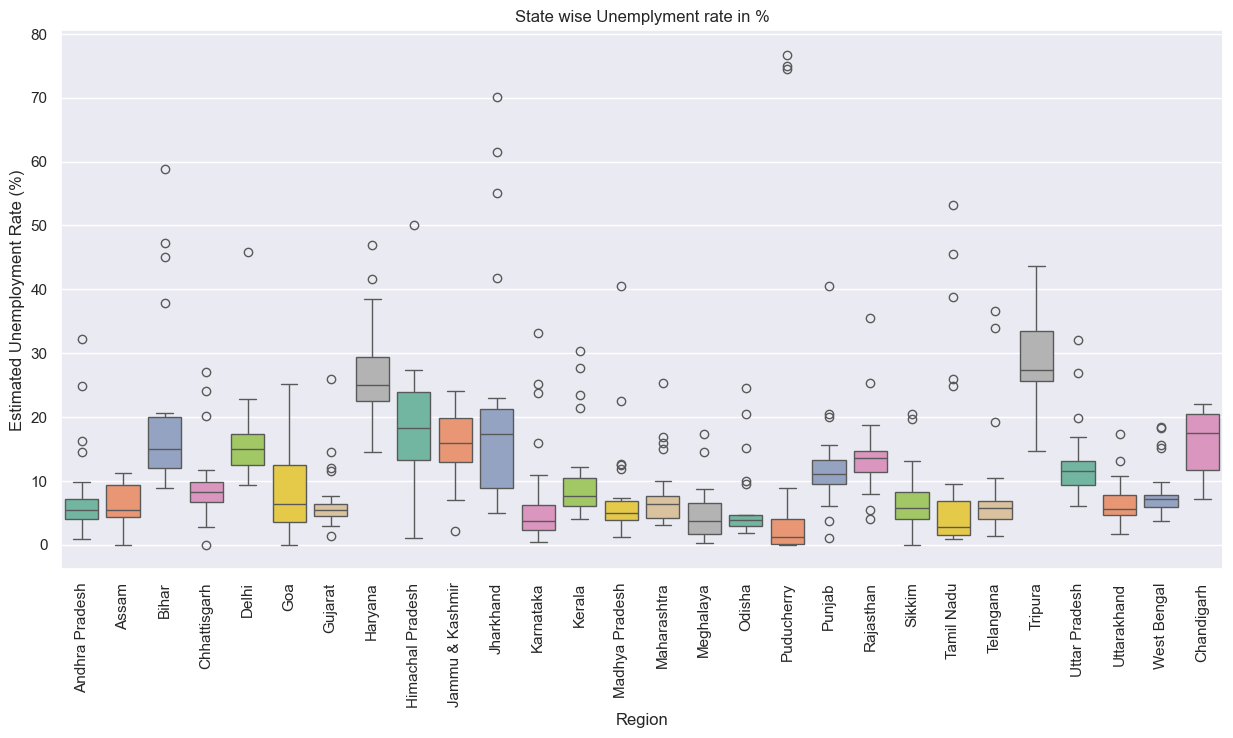

In [131]:
plt.figure(figsize=(15,7))

sns.boxplot(data=df, x='Region', y='Estimated Unemployment Rate (%)', palette=sns.color_palette('Set2'))

plt.xticks(rotation=90)

plt.title('State wise Unemplyment rate in %')
plt.show()

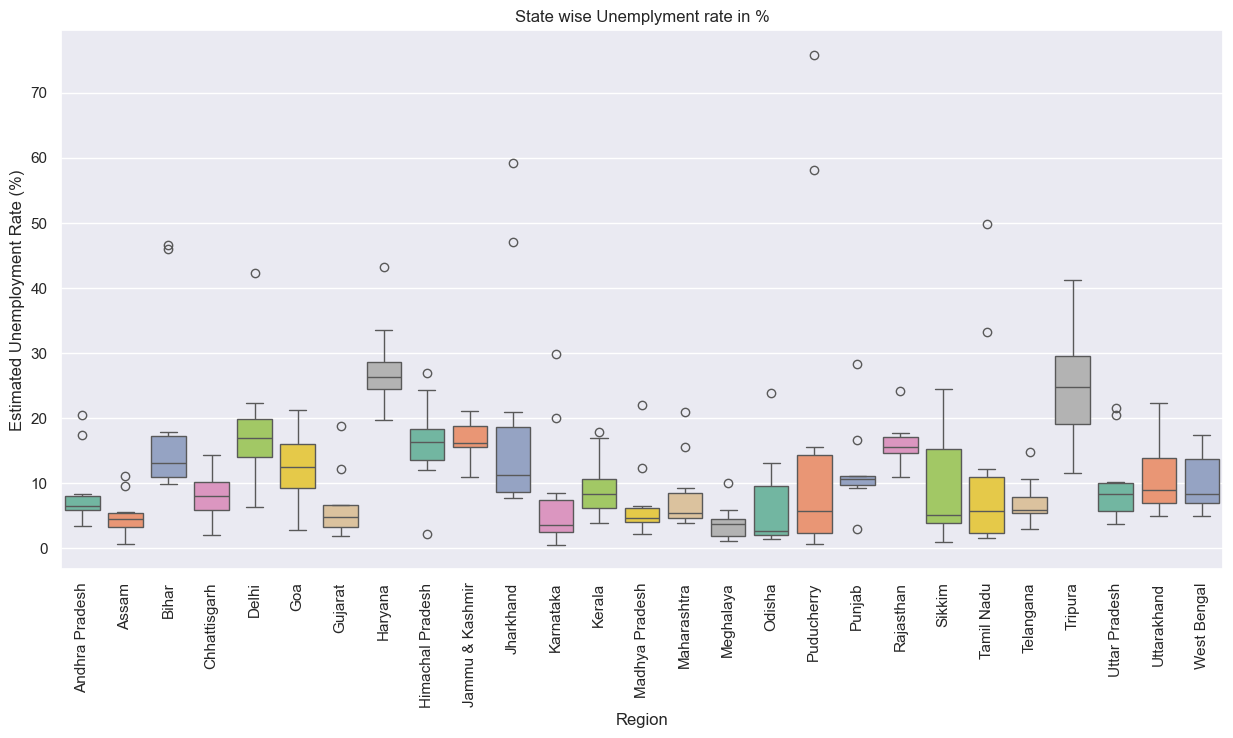

In [129]:
plt.figure(figsize=(15,7))

sns.boxplot(data=df_2, x='Region', y='Estimated Unemployment Rate (%)', palette=sns.color_palette('Set2'))

plt.xticks(rotation=90)

plt.title('State wise Unemplyment rate in %')
plt.show()

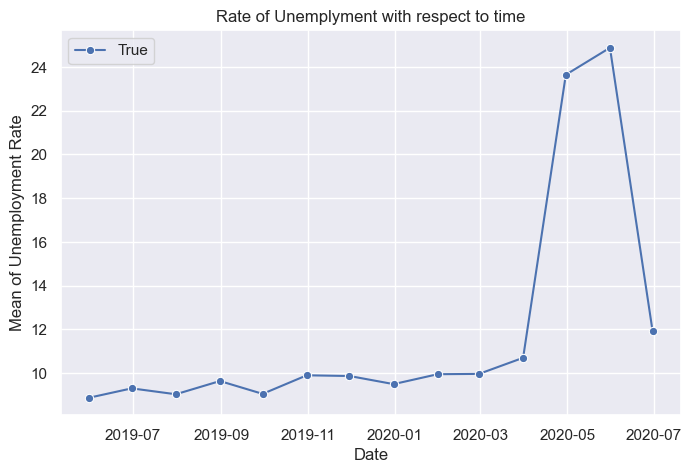

In [34]:
# Average of unemplyment rate by Date wise

plt.figure(figsize=(8,5))
unemp_mean = df.groupby('Date')['Estimated Unemployment Rate (%)'].mean()

sns.lineplot(x=unemp_mean.index, y=unemp_mean.values, markers=True, style=True)

plt.title('Rate of Unemplyment with respect to time')
plt.ylabel('Mean of Unemployment Rate')
plt.xlabel('Date')
plt.show()


 - During the Covid, the unemployment rate has been 

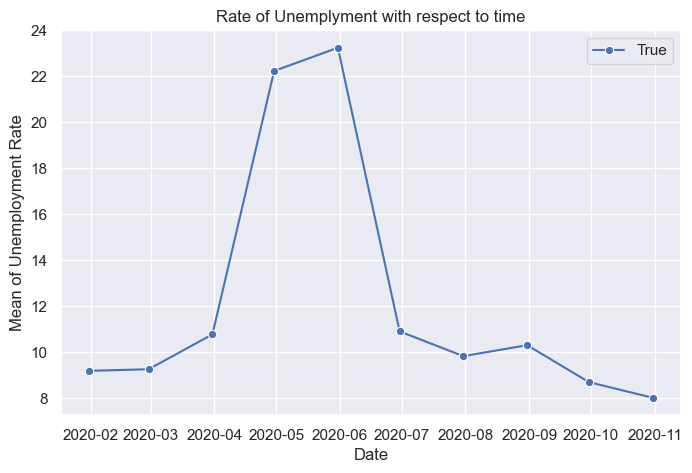

In [35]:
# Average of unemplyment rate by Date wise

plt.figure(figsize=(8,5))
unemp_mean = df_2.groupby('Date')['Estimated Unemployment Rate (%)'].mean()

sns.lineplot(x=unemp_mean.index, y=unemp_mean.values, markers=True, style=True)

plt.title('Rate of Unemplyment with respect to time')
plt.ylabel('Mean of Unemployment Rate')
plt.xlabel('Date')
plt.show()


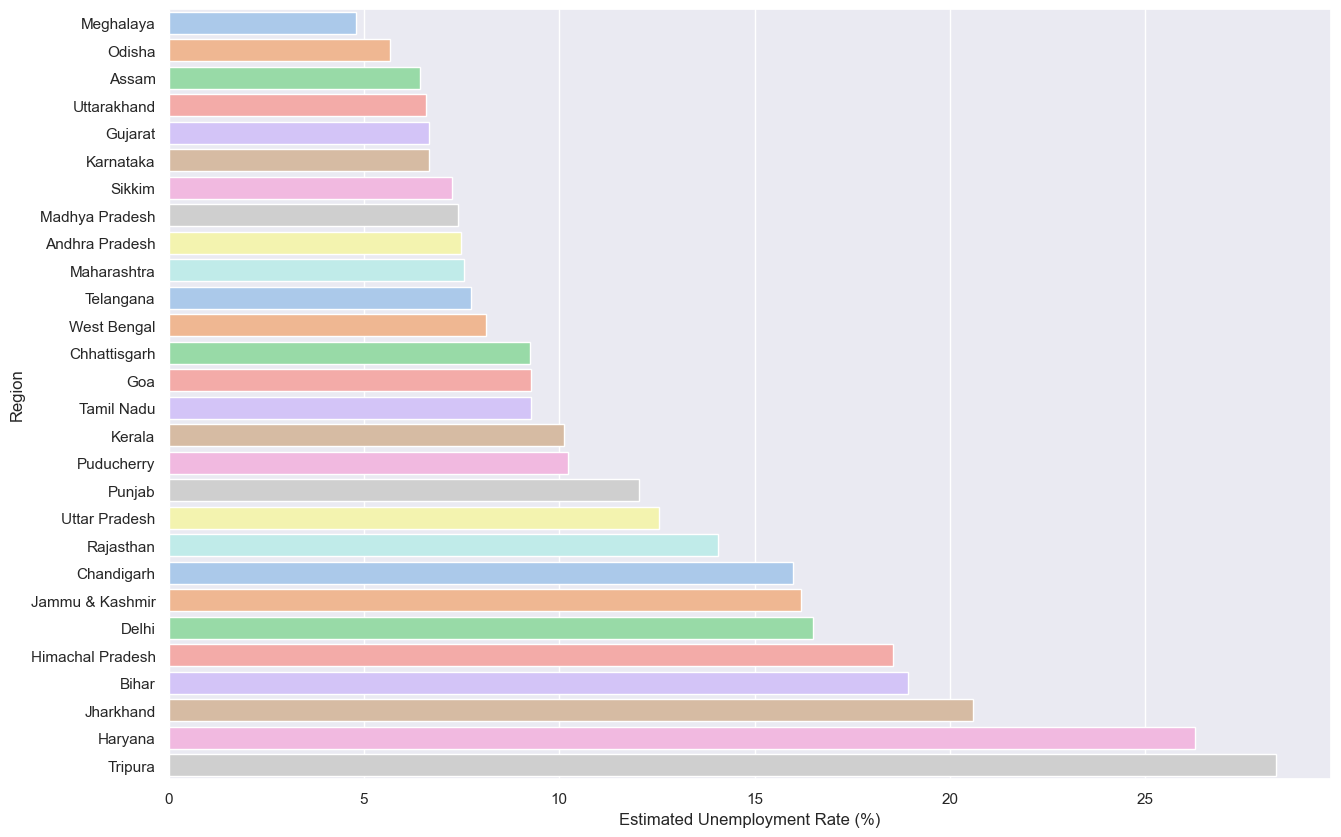

In [98]:
# State wise unemployment rate

region_df = df[['Estimated Unemployment Rate (%)', 'Region']].groupby('Region').mean().reset_index()


plt.figure(figsize=(15,10))

ax = sns.barplot(data=region_df, y='Region', x='Estimated Unemployment Rate (%)', order=region_df.sort_values('Estimated Unemployment Rate (%)').Region,
                 palette=sns.color_palette("pastel"))

plt.show()


#### States with average lowest unemployment rate of around 5 to 8 % are:
 - Meghalaya
 - Odisha
 - Assam
 - Uttarakhand
 - Gujarat
 - Karnataka

#### States with average highest unemployment rate of around 26 to 27 % are:
 - Tripura
 - Haryana



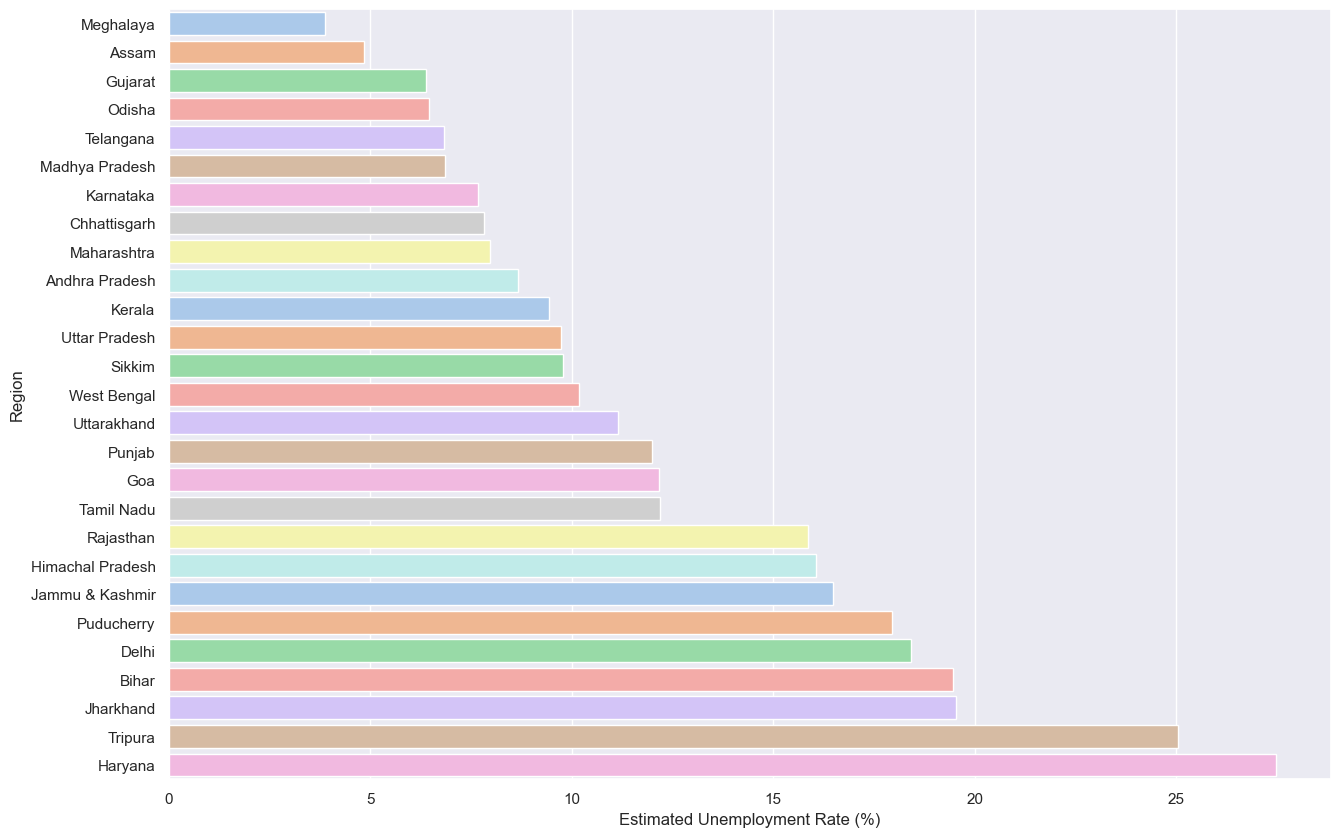

In [96]:
# State wise unemployment rate

region_df_2 = df_2[['Estimated Unemployment Rate (%)', 'Region']].groupby('Region').mean().reset_index()

plt.figure(figsize=(15,10))

ax = sns.barplot(data=region_df_2, y='Region', x='Estimated Unemployment Rate (%)', order=region_df_2.sort_values('Estimated Unemployment Rate (%)').Region,
                 palette=sns.color_palette("pastel"))

plt.show()

#### States with average lowest unemployment rate of around 4 to 7 % are:
 - Meghalaya
 - Assam
 - Gujarat
 - Odisha
 - Telangana
 - Madhya Pradesh

#### States with average highest unemployment rate of around 25 to 27 % are:
 - Haryana
 - Tripura

In [115]:
# Correlation between emplyed, unemployed and labour participation rates

df_stat = df[['Estimated Unemployment Rate (%)', 'Estimated Employed', 'Estimated Labour Participation Rate (%)']]
df_stat.corr()

,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%)
Estimated Unemployment Rate (%),1.000000,-0.222868,0.002558
Estimated Employed,-0.222868,1.000000,0.011307
Estimated Labour Participation Rate (%),0.002558,0.011307,1.000000


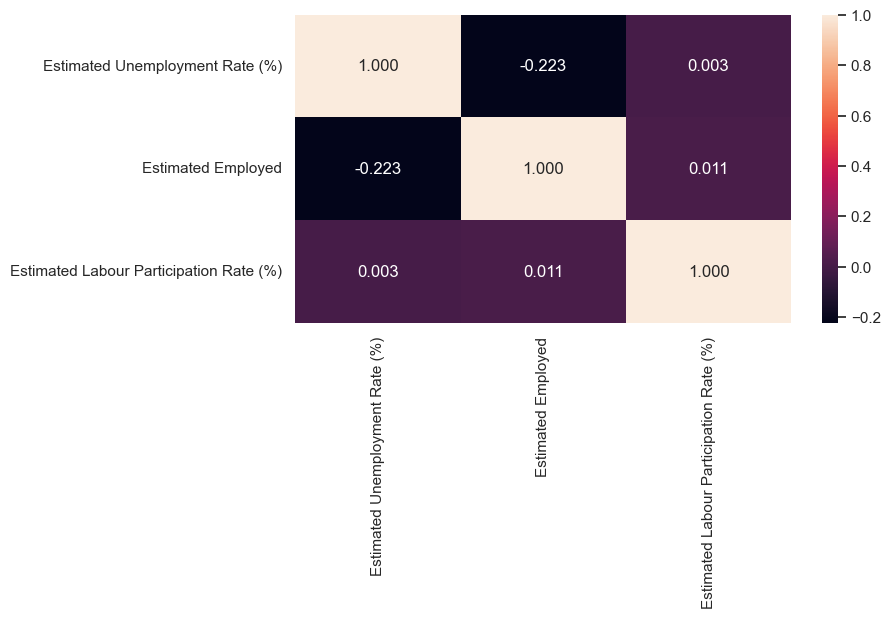

In [117]:
plt.figure(figsize=(8,4))

sns.heatmap(data=df_stat.corr(), annot=True, fmt='.3f')

plt.show()

### By the graph, we can understand:
- No of estimated employed had no impact on unemployment rate.
- Labour participation rate is not altered depending on the unemployment rate.